# Data Cleaning in Python

> ### Most Common Techniques For Data Cleaning

#### Common commands and functions used for data cleaning in Python:

1. **Importing Libraries:**
- import pandas as pd
- import numpy as np

2. **Reading Data:**
- df = pd.read_csv('filename.csv')
- df = pd.read_excel('filename.xlsx')
- df = pd.read_sql('SELECT * FROM table', connection)

3. **Exploring Data:**
- df.head()  # Display the first few rows
- df.info()  # Get information about the DataFrame
- df.describe()  # Generate descriptive statistics

4. **Handling Missing Values:**
- df.isnull()  # Check for missing values
- df.dropna()  # Drop rows with missing values
- df.fillna(value)  # Fill missing values with a specified value

5. **Removing Duplicates:**
- df.duplicated()  # Check for duplicate rows
- df.drop_duplicates()  # Remove duplicate rows

6. **Filtering Data:**
- df[df['column'] > value]  # Filter rows based on a condition
- df.query('condition')  # Filter rows using a query string

7. **Handling Outliers:**
- import scipy.stats as stats
- z_scores = stats.zscore(df['column'])
- df = df[(z_scores < threshold)]

8. **Data Imputation:**
- from sklearn.impute import SimpleImputer
- imputer = SimpleImputer(strategy='mean')
- df['column'] = imputer.fit_transform(df[['column']])

9. **Data Transformation:**
- df.apply(func)  # Apply a function to each element or column
- df.map(dict)  # Map values using a dictionary
- df.replace(old_value, new_value)  # Replace values with new ones
- df.rename(columns={'old_name': 'new_name'})  # Rename columns

10. **Data Standardization or Normalization:**
- from sklearn.preprocessing import StandardScaler, MinMaxScaler
- scaler = StandardScaler()
- df['column'] = scaler.fit_transform(df[['column']])

These commands should provide a good starting point for cleaning data in Python

***

#  Handling missing values

### Steps:
- Take a first look at the data
- See how many missing data points we have
- Figure out why the data is missing
- Drop missing values
- Filling in missing values

Datasets:
1. Detailed NFL Play-by-Play Data 

Contains all the regular season plays from the 2009-2016 NFL seasons. The dataset has 356,768 rows and 100 columns.

2. San Francisco Building Permits

A building permit is an official approval document issued by a governmental agency that allows you or your contractor to proceed with a construction or remodeling project on one's property. The data was downloaded for the dates ranging from Jan 1st, 2013 to Feb 25th, 2018 using the filter in San Francisco open data portal. There are 43 columns and close to 200k records


In [1]:
# modules we'll use
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# read in all our data
nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")
sf_permits = pd.read_csv("Building_Permits.csv")

In [5]:
# set seed for reproducibility
np.random.seed(0) 

By setting a seed value, it ensures that the random numbers generated by NumPy will be the same every time the code is run, which makes the results reproducible. The specific value chosen for the seed doesn't matter as long as it's the same across different runs of the code if you want the same random numbers to be generated.Setting the seed is often useful in scenarios where you want to ensure that random processes, such as initialization of weights in machine learning models or random sampling, produce consistent results for debugging or comparison purposes.

Note that the code doesn't produce any output or result by itself. It simply sets the seed value for random number generation.

In [6]:
# look at a few rows of the nfl_data file. I can see a handful of missing data already!
nfl_data.sample(5)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
244485,2014-10-26,2014102607,18,3,1.0,00:39,1,939.0,12.0,TB,...,1.240299,0.225647,0.774353,0.245582,0.754418,0.225647,0.019935,-0.018156,0.038091,2014
115340,2011-11-20,2011112000,22,4,1.0,06:47,7,407.0,44.0,OAK,...,NaN,0.056036,0.943964,0.042963,0.957037,0.943964,0.013073,NaN,NaN,2011
68357,2010-11-14,2010111401,8,2,NaN,00:23,1,1823.0,0.0,CLE,...,NaN,0.365307,0.634693,0.384697,0.615303,0.634693,-0.019390,NaN,NaN,2010
368377,2017-09-24,2017092405,24,4,1.0,08:48,9,528.0,8.0,CLE,...,1.075660,0.935995,0.064005,0.921231,0.078769,0.064005,0.014764,0.003866,0.010899,2017
384684,2017-11-05,2017110505,11,2,1.0,09:15,10,2355.0,0.0,DEN,...,NaN,0.928474,0.071526,0.934641,0.065359,0.071526,-0.006166,NaN,NaN,2017


In [7]:
sf_permits.sample(5) #A lot of missing values here as well , especially on the Site Permit

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
78651,201503120624,8,otc alterations permit,03/12/2015,4273,029,2986,NaN,26th,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94110.0,"(37.74972976527956, -122.40963202424835)",1374057173006
177779,201707071220,8,otc alterations permit,07/07/2017,0453,004A,950,NaN,Bay,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Russian Hill,94109.0,"(37.80472551510833, -122.42280760820965)",1469546420378
64978,M529127,8,otc alterations permit,10/21/2014,0478,011,1290,NaN,Chestnut,St,...,NaN,NaN,NaN,NaN,NaN,2.0,Russian Hill,94109.0,"(37.80244997614665, -122.42443255018165)",1359656465959
165958,201704073507,8,otc alterations permit,04/07/2017,6507,003A,1134,NaN,Noe,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Noe Valley,94114.0,"(37.750866393629146, -122.43209633372915)",1458922436280
147902,201701237639,8,otc alterations permit,01/23/2017,0623,001,1755,NaN,Van Ness,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Pacific Heights,94109.0,"(37.791925784456105, -122.42306858292103)",1450933235988


### How many missing points we have?

In [39]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the number of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

### It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [40]:
# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

In [41]:
# percent of data that is missing
(total_missing/total_cells) * 100

24.87214126835169

***

To find the % of total missing values in the dataset , we calculate the number of data rows x columns and the then we divided the by number of missing values :
$$ \frac{Total\ Number\ of\ Data}{Total\ Number\ of\ Missing\ Data} *100 $$

In [11]:
total_cells

41584176

In [13]:
nfl_data.shape

(407688, 102)

In [14]:
102*407688

41584176

In [15]:
missing_values_count.sum()

10342875

***

### 24.9% of the NFL data are missing

In [28]:
missing_count = sf_permits.isnull().sum()
missing_count[0:10]

Permit Number                  0
Permit Type                    0
Permit Type Definition         0
Permit Creation Date           0
Block                          0
Lot                            0
Street Number                  0
Street Number Suffix      196684
Street Name                    0
Street Suffix               2768
dtype: int64

In [29]:
sf_permits.shape

(198900, 43)

In [34]:
# how many total missing values do we have?
total_cells = np.product(sf_permits.shape)
total_missing = missing_values_count.sum()

In [35]:
total_missing 

2245941

In [38]:
# percent of data that is missing
(total_missing/total_cells) * 100

26.26002315058403

### 26.3% of the San Francisco data are missing

## Figuring out why the data is missing


This is the point at which we get into the part of data science called **"data intution"**, by which I mean "really looking at your data and trying to figure out **why** it is the way it is and **how** that will affect your analysis".For dealing with missing values, you'll need to use your intution to figure out why the value is missing. One of the most important question you can ask yourself to help figure this out is this:

> **Is this value missing because it wasn't recorded or because it dosen't exist?**

- If a value is missing because **it doens't exist** (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. 
- On the other hand, if a value is missing because **it wasn't recorded**, then you can try to guess what it might have been based on the other values in that column and row. (This is called "imputation")

In [42]:
# look at the # of missing points in the first ten columns NFL data
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

**TimeSecs**: this column has information on the number of seconds left in the game when the play was made. his means that these values are probably missing because they were not recorded, rather than because they don't exist. 

So, it would make sense for us to try and guess what they should be rather than just leaving them as NA's.


On the other hand, there are other fields, like **PenalizedTeam** that also have lot of missing fields. In this case, though, the field is missing because if there was no penalty then it doesn't make sense to say which team was penalized

For this column, it would make more sense to either leave it empty or to add a third value like "neither" and use that to replace the NA's.

## Drop missing values


If you're sure you want to drop rows with missing values, pandas does have a handy function, dropna() to help you do this. Let's try it out on our NFL dataset!

In [48]:
# remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


 it looks like that's removed all our data! 😱 This is because every row in our dataset had at least one missing value. We might have better luck removing all the columns that have at least one missing value instead.

In [56]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [50]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


***

Trying the same on the sf data

In [52]:
# remove all the rows that contain a missing value
sf_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [54]:
# remove all columns with at least one missing value
columns_dropped = sf_permits.dropna(axis=1)
columns_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [55]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % sf_permits.shape[1])
print("Columns with na's dropped: %d" % columns_dropped.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


***

## Filling in missing values automatically


In [57]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [58]:
# get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


We can use the Panda's fillna() function to fill in missing values in a dataframe for us. One option we have is to specify what we want the NaN values to be replaced with. Here, I'm saying that I would like to replace all the NaN values with 0.

In [59]:
# replace all NA's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


I could also be a bit more savvy and replace missing values with whatever value comes directly after it in the same column. (This makes a lot of sense for datasets where the observations have some sort of logical order to them.)

In [60]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
subset_nfl_data.fillna(method = 'bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


## Missing Values (Extra)

Python libraries represent missing numbers as nan which is short for "not a number". You can detect which cells have missing values, and then count how many there are in each column with the command:

> missing_val_count_by_column = (data.isnull().sum())
> print(missing_val_count_by_column[missing_val_count_by_column > 0

### A Simple Option: Drop Columns with Missing Values
If your data is in a DataFrame called original_data, you can drop columns with missing values. One way to do that is
> data_without_missing_values = original_data.dropna(axis=1)


In many cases, you'll have both a training dataset and a test dataset. You will want to drop the same columns in both DataFrames. In that case, you would write
> cols_with_missing = [col for col in original_data.columns 
                                 if original_data[col].isnull().any()]
                                 
> reduced_original_data = original_data.drop(cols_with_missing, axis=1)

> reduced_test_data = test_data.drop(cols_with_missing, axis=1)

### A Better Option: Imputation
Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.

This is done with

> from sklearn.impute import SimpleImputer

>my_imputer = SimpleImputer()

> data_with_imputed_values = my_imputer.fit_transform(original_data)

The default behavior fills in the mean value for imputation. Statisticians have researched more complex strategies, but those complex strategies typically give no benefit once you plug the results into sophisticated machine learning models.

## Conclusion on handling missing values:
> 1. ***Number of missing values in the dataset:***
missing_values_count = **df.isnull().sum()**

> 2. ***Percentage of missing values in the dataset*** :

> total_data = np.product(df.shape)

> total_missing = missing_values_count.sum()

> **(total_missing/total_data) * 100**

> 3. ***Dropping rows or collumns with missing data***:

> rows: **df.dropna()**

> cols : **df.dropna(axis = 1)**

> 4. ***Filling missing Data*** :

> all na's into 0 : **df.fillna(0)**

> using other filling methods: **df.fillna(method = 'bfill', axis=0)**

## dataframe.fillna()

In [61]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))

In [62]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [63]:
# Replace all NaN elements with 0s.
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


In [64]:
# We can also propagate non-null values forward or backward.
df.fillna(method="ffill")
# filling the NAN value with whatever comes before it .
# ffill: propagate last valid observation forward to next valid.
# bfill: use next valid observation to fill gap.

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,4.0,NaN,1.0
3,3.0,3.0,NaN,4.0


In [66]:
# Replace all NaN elements in column ‘A’, ‘B’, ‘C’, and ‘D’, with 0, 1, 2, and 3 respectively.

values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


In [67]:
# Only replace the first NaN element.
df.fillna(value=values, limit=1)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,NaN,1.0
2,NaN,1.0,NaN,3.0
3,NaN,3.0,NaN,4.0


****

# Scaling and Normalization

### Get our environment set up

In [4]:
# modules we'll use
import pandas as pd
import numpy as np

In [5]:
# for Box-Cox Transformation
from scipy import stats

In [6]:
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [7]:
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("ks-projects-201801.csv")

In [9]:
# set seed for reproducibility
np.random.seed(0)

# Scaling vs. Normalization: What's the difference?

#### In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties.

#### The difference is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data. 

- **Scaling** : changing range of your data
- **Normalization** : changing the shape of distribution of your data 

## Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. 

**For example**, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! 

**Scaling** helps comparing different variables on equal footing

In [3]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

In [10]:
original_data

array([9.12328184e-02, 1.33566928e+00, 5.93445384e-02, 3.68055440e-01,
       4.54915156e-01, 4.69842483e-01, 2.97297285e-01, 5.56749700e-01,
       2.51414125e+00, 2.11667255e+00, 1.07257574e+00, 1.59071363e+00,
       3.47735235e-02, 1.64510807e-01, 6.78979156e-01, 3.42091312e-01,
       7.87908744e-01, 2.50187809e+00, 2.29958971e+00, 1.50221708e+00,
       2.94460048e-02, 4.69007417e-01, 6.35690335e-01, 2.28711150e+00,
       4.11732651e-01, 2.02600330e+00, 1.20075689e+00, 1.01035716e+00,
       2.20825974e+00, 8.63677573e-01, 1.73565933e+00, 1.28600875e+00,
       5.50121643e-01, 1.23722564e+00, 5.34561175e+00, 1.33061247e+00,
       8.56136220e-01, 1.22015824e+00, 4.34637399e-01, 5.22712878e-01,
       6.39496294e-01, 2.78011032e-01, 2.73000035e+00, 3.93621293e-01,
       1.06618974e+00, 2.68037466e+00, 1.47321187e+00, 6.26578787e-01,
       2.26475993e-01, 2.62501038e-01, 3.24054924e+00, 1.80552124e+00,
       1.28014292e+00, 1.17609182e-01, 3.33819638e-01, 4.24953447e-01,
      

In [11]:
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

In [12]:
scaled_data

array([[1.11303617e-02],
       [1.64744877e-01],
       [7.19403964e-03],
       [4.53016305e-02],
       [5.60236830e-02],
       [5.78663276e-02],
       [3.65671712e-02],
       [6.85942438e-02],
       [3.10216667e-01],
       [2.61152723e-01],
       [1.32268340e-01],
       [1.96227814e-01],
       [4.16096833e-03],
       [2.01758719e-02],
       [8.36823734e-02],
       [4.20965919e-02],
       [9.71287537e-02],
       [3.08702890e-01],
       [2.83732205e-01],
       [1.85303709e-01],
       [3.50333394e-03],
       [5.77632463e-02],
       [7.83387569e-02],
       [2.82191882e-01],
       [5.06931902e-02],
       [2.49960418e-01],
       [1.48091153e-01],
       [1.24588014e-01],
       [2.72458340e-01],
       [1.06481736e-01],
       [2.14120059e-01],
       [1.58614730e-01],
       [6.77760696e-02],
       [1.52592893e-01],
       [6.59736295e-01],
       [1.64120659e-01],
       [1.05550823e-01],
       [1.50486076e-01],
       [5.35205759e-02],
       [6.43927035e-02],


Text(0.5, 1.0, 'Scaled data')

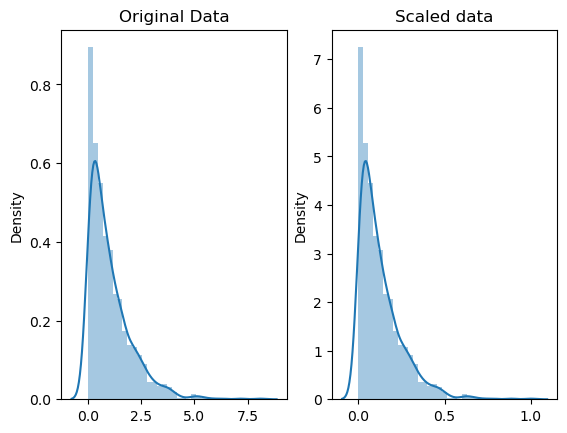

In [18]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.



*Explain the code above:

1. **fig, ax = plt.subplots(1, 2)**
 - **plt.subplots(1, 2)** creates a figure object (fig) and a NumPy array of axes objects (ax) with one row and two columns, indicating that we want two subplots side by side.
 - The **fig** object represents the entire figure, while **ax** is an array containing the individual axes objects for each subplot.

2. **sns.distplot(original_data, ax=ax[0])**
 - **sns.distplot** is a function from the Seaborn library that plots the **distribution** of data using a **histogram** and a kernel density estimation plot.
 - **original_data** is the dataset we want to plot.
 - **ax=ax[0]** specifies what we want to plot on the first subplot ax[0] 

3. **ax[0].set_title("Original Data")**
 - ax[0] refers to the first subplot.
 - .set_title("Original Data") sets the title of the first subplot to "Original Data".
 
 In summary, the provided code creates a figure with two subplots. The sns.distplot function is used to plot the distribution of the original_data on the left subplot and the distribution of the scaled_data on the right subplot. The ax.set_title method is then used to set titles for each subplot.

 This allows for a visual comparison of the original data distribution and the scaled data distribution side by side.

## Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can **be described as a normal distribution**.

> **Normal distribution:** Also known as the "bell curve", this is a specific statistical distribution where a roughly **equal** observations fall **above** and **below** the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the **Gaussian distribution**.

Only normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include **t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes.** (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method were using to normalize here is called the Box-Cox Transformation. Let's take a quick peek at what normalizing some data looks like:

In [19]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

Text(0.5, 1.0, 'Normalized data')

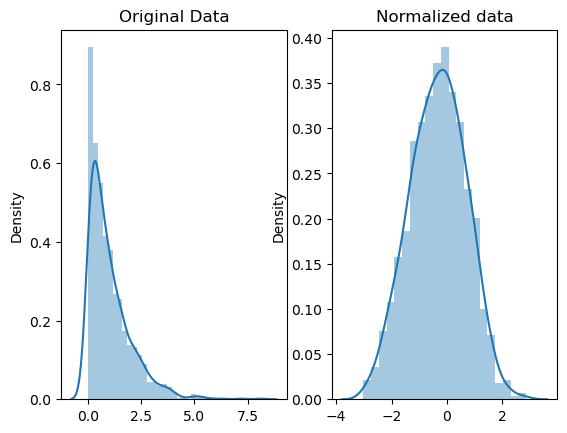

In [20]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

*The Box-Cox transformation is a method used to transform non-normal data into a normal distribution. It is named after statisticians George Box and David Cox. This transformation is particularly useful when working with data that violates the assumption of normality required by many statistical techniques.

The Box-Cox transformation applies a power transformation to the data, which is defined by the parameter lambda (λ). The transformation is given by the formula:

y(lambda) = (x^lambda - 1) / lambda

where y(lambda) is the transformed data and x is the original data.

The value of lambda determines the type of transformation applied:

lambda = 0: Logarithmic transformation
lambda = 1: No transformation (identity)
lambda = -1: Reciprocal transformation
lambda between -1 and 1: Variations of power transformations
To determine the optimal lambda value, statistical techniques like maximum likelihood estimation can be used.

Here's a Python example using the scipy.stats module to apply the Box-Cox transformation:

Lambda value: 0.2420131978174143


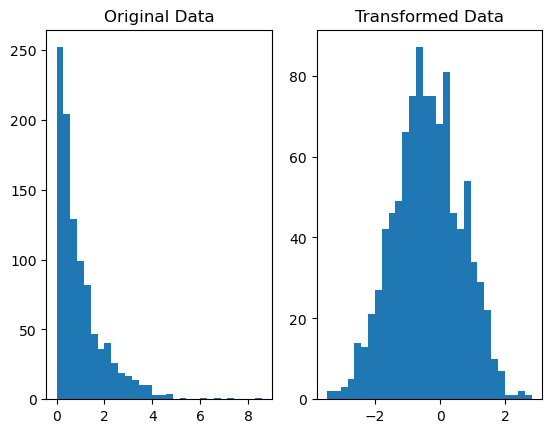

In [21]:
import numpy as np
from scipy import stats

# Generate non-normal data
original_data = np.random.exponential(size=1000)

# Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(original_data)

# Print the estimated lambda value
print("Lambda value:", lambda_value)

# Compare the distributions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)

# Plot the original data
ax[0].hist(original_data, bins=30)
ax[0].set_title("Original Data")

# Plot the transformed data
ax[1].hist(transformed_data, bins=30)
ax[1].set_title("Transformed Data")

plt.show()

Practice scaling on the
dataset of Kickstarter campaigns. (Kickstarter is a website where people can ask people to invest in various projects and concept products.)

Let's start by scaling the goals of each campaign, which is how much money they were asking for.

In [23]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Text(0.5, 1.0, 'Scaled data')

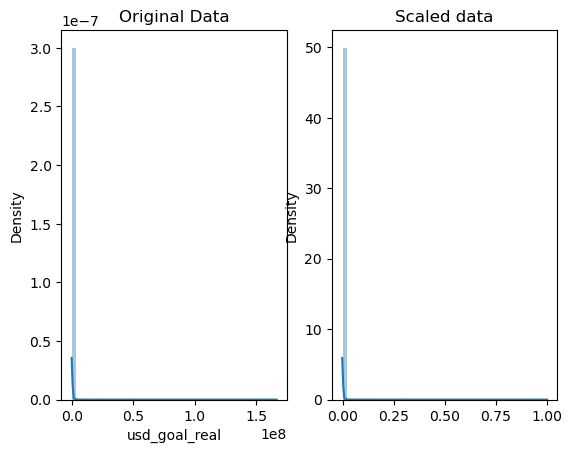

In [24]:
# select the usd_goal_real column
usd_goal = df.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

RANGE CHANGE NOT SHAPE OF DATA

Text(0.5, 1.0, 'Normalized data')

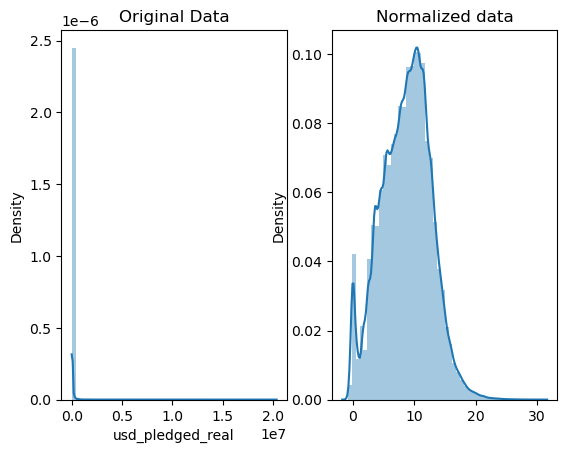

In [25]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = df.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = df.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

## Code on Scaling and Normalization:

> from mlxtend.preprocessing import minmax_scaling
> scaled_data = **minmax_scaling(original_data, columns = [0])**

**columns=[0]** indicates that only the first column of the original_data should be scaled. The columns parameter accepts a list of column indices or column names to specify the subset of columns to be scaled. By providing [0], it implies that you want to scale the data in the first column of the dataset.

> from scipy import stats
> normalized_data = **stats.boxcox(original_data)**
 

***

# Parsing Dates

we'll be working with two datasets: one containing information on earthquakes that occured between 1965 and 2016, and another that contains information on landslides that occured between 2007 and 2016.

In [27]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [28]:
# read in our data
earthquakes = pd.read_csv("earthquake.csv")
landslides = pd.read_csv("catalog.csv")
volcanos = pd.read_csv("volcano.csv")

# set seed for reproducibility
np.random.seed(0)

In [29]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [30]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

Some examples:

- 1/17/07 has the format "%m/%d/%y"
- 17-1-2007 has the format "%d-%m-%Y"

Looking back up at the head of the date column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates:

In [31]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

In [32]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:
> landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

#### Select just the day of the month from our column

In [33]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [34]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day

#### Plot the day of the month to check the date parsing

let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

<AxesSubplot:xlabel='date_parsed'>

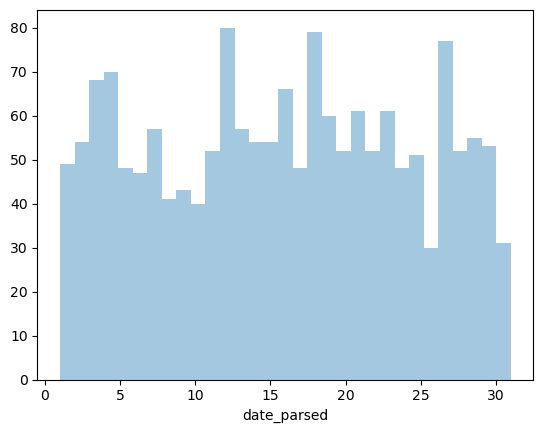

In [35]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

#### Extra 

 The datetime module can parse strings representing dates and times into datetime objects, allowing you to perform various operations and manipulations on the parsed dates.

1. datatime class:

In [37]:
from datetime import datetime

# Current date and time
current_datetime = datetime.now()
print(current_datetime)

# Formatting datetime as string
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")
print(formatted_datetime)

# Extracting date and time components
date = current_datetime.date()
time = current_datetime.time()
print(date)
print(time)

# Arithmetic operations with timedelta
from datetime import timedelta

one_day = timedelta(days=1)
yesterday = current_datetime - one_day
print(yesterday)


2023-06-04 20:49:00.585904
2023-06-04 20:49:00
2023-06-04
20:49:00.585904
2023-06-03 20:49:00.585904


2. data class:

In [38]:
from datetime import date

# Creating a date object
birthday = date(1990, 5, 15)
print(birthday)

# Formatting date as string
formatted_date = birthday.strftime("%d-%b-%Y")
print(formatted_date)

# Extracting individual components
year = birthday.year
month = birthday.month
day = birthday.day
print(year, month, day)

# Arithmetic operations with other date objects
today = date.today()
days_passed = today - birthday
print(days_passed.days)


1990-05-15
15-May-1990
1990 5 15
12073


3. time class:

In [39]:
from datetime import time

# Creating a time object
meeting_time = time(14, 30, 0)
print(meeting_time)

# Formatting time as string
formatted_time = meeting_time.strftime("%H:%M:%S")
print(formatted_time)

# Extracting individual components
hour = meeting_time.hour
minute = meeting_time.minute
second = meeting_time.second
print(hour, minute, second)


14:30:00
14:30:00
14 30 0


4. timedelta class

In [40]:
from datetime import datetime, timedelta

# Calculating future dates
current_datetime = datetime.now()
one_week = timedelta(weeks=1)
future_datetime = current_datetime + one_week
print(future_datetime)

# Time difference between two dates
start_date = date(2023, 1, 1)
end_date = date(2023, 12, 31)
duration = end_date - start_date
print(duration.days)

2023-06-11 20:51:43.465545
364


5. pd.to_datetime()
The pd.to_datetime() function is a powerful method provided by the pandas library in Python. It is used to convert a wide range of input types into pandas' DatetimeIndex object, which represents dates and times in a structured format.

In [41]:
import pandas as pd

# Example usage with different input types
date_string = "2023-06-04"
date_integer = 20230604
date_list = ["2023-06-04", "2023-06-05", "2023-06-06"]
series = pd.Series(date_list)

# Converting different input types to pandas' DatetimeIndex
datetime_index_string = pd.to_datetime(date_string)
datetime_index_integer = pd.to_datetime(date_integer, format="%Y%m%d")
datetime_index_list = pd.to_datetime(date_list)
datetime_index_series = pd.to_datetime(series)

# Displaying the converted DatetimeIndex objects
print(datetime_index_string)
print(datetime_index_integer)
print(datetime_index_list)
print(datetime_index_series)

2023-06-04 00:00:00
2023-06-04 00:00:00
DatetimeIndex(['2023-06-04', '2023-06-05', '2023-06-06'], dtype='datetime64[ns]', freq=None)
0   2023-06-04
1   2023-06-05
2   2023-06-06
dtype: datetime64[ns]


Accessing datetime properties: In pandas, the dt accessor is used to access various datetime properties and methods of a Series or DataFrame column containing datetime values. It provides a convenient way to extract and manipulate specific components of the datetime objects.

In [44]:
# Create a sample DataFrame with a datetime column
df = pd.DataFrame({
    'date': ['2023-06-04', '2023-06-05', '2023-06-06'],
    'value': [10, 15, 12]
})
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime

# Accessing datetime properties using dt accessor
print(df['date'].dt.year)        # Extract year component
print(df['date'].dt.month)       # Extract month component
print(df['date'].dt.day)         # Extract day component
print(df['date'].dt.hour)        # Extract hour component
print(df['date'].dt.minute)      # Extract minute component
print(df['date'].dt.second)      # Extract second component

# Performing datetime operations with dt accessor
one_day = pd.Timedelta(days=1)
tomorrow = df['date'] + one_day
print(tomorrow)

0    2023
1    2023
2    2023
Name: date, dtype: int64
0    6
1    6
2    6
Name: date, dtype: int64
0    4
1    5
2    6
Name: date, dtype: int64
0    0
1    0
2    0
Name: date, dtype: int64
0    0
1    0
2    0
Name: date, dtype: int64
0    0
1    0
2    0
Name: date, dtype: int64
0   2023-06-05
1   2023-06-06
2   2023-06-07
Name: date, dtype: datetime64[ns]


***

# Character Encodings

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import chardet

# set seed for reproducibility
np.random.seed(0)

## What are encodings?

Character encodings are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi"). There are many different encodings, and if you tried to read in text with a different encoding that the one it was originally written in, you ended up with scrambled text called "mojibake" (said like mo-gee-bah-kay). Here's an example of mojibake:

æ–‡å—åŒ–ã??

You might also end up with a "unknown" characters. There are what gets printed when there's no mapping between a particular byte and a character in the encoding you're using to read your byte string in and they look like this:

����������

Character encoding mismatches are less common today than they used to be, but it's definitely still a problem. There are lots of different character encodings, but the main one you need to know is UTF-8.

> UTF-8 is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. It's when things aren't in UTF-8 that you run into trouble.


In [2]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

 bytes data type, which is a sequence of integers. You can convert a string into bytes by specifying which encoding it's in:

In [3]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

In [4]:
# take a look at what the bytes look like
after #\xe2\x82\xac" when it's printed as if it were an ASCII string

b'This is the euro symbol: \xe2\x82\xac'

In [5]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


In [6]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


Most files you'll encounter will probably be encoded with UTF-8. This is what Python expects by default, so most of the time you won't run into problems. However, sometimes you'll get an error like this:

In [7]:
# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7955: invalid start byte

I'm going to just look at the first ten thousand bytes of this file. This is usually enough for a good guess about what the encoding is and is much faster than trying to look at the whole file. (Especially with a large file this can be very slow.) Another reason to just look at the first part of the file is that we can see by looking at the error message that the first problem is the 11th character. So we probably only need to look at the first little bit of the file to figure out what's going on.

In [8]:
# look at the first ten thousand bytes to guess the character encoding
with open("ks-projects-201801.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [9]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

C:\Users\zweis\AppData\Local\Temp\ipykernel_12100\4281713030.py:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_2016 = pd.read_csv("ks-projects-201612.csv", encoding='Windows-1252')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Saving your files with UTF-8 encoding

In [10]:
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")

*Extra*

In Python, the encode() and decode() functions are used to convert between Unicode strings and byte strings with a specific character encoding. Here's an explanation of each function along with an example:
1. encode(encoding='utf-8', errors='strict'):

- The encode() function is used to encode a Unicode string into a byte string using the specified encoding.
- encoding parameter is optional and defaults to 'utf-8', which is a widely used encoding for Unicode.
- errors parameter is optional and specifies how to handle encoding errors. The default value is 'strict', which raises a UnicodeEncodeError if there is an unencodable character. Other error handling options include 'ignore', 'replace', and more.



In [37]:
text = "Hello, 你好"
encoded_text = text.encode('utf-8')
print(encoded_text)  # Output: b'Hello, \xe4\xbd\xa0\xe5\xa5\xbd'

b'Hello, \xe4\xbd\xa0\xe5\xa5\xbd'


2. decode(encoding='utf-8', errors='strict'):

- The decode() function is used to decode a byte string into a Unicode string using the specified encoding.
- The encoding parameter is optional and defaults to 'utf-8' (or the encoding of the byte string if not specified).
- The errors parameter is optional and specifies how to handle decoding errors. The default value is 'strict', which raises a UnicodeDecodeError if there is an invalid byte sequence. Other error handling options include 'ignore', 'replace', and more.

In [38]:
byte_string = b'Hello, \xe4\xbd\xa0\xe5\xa5\xbd'
decoded_text = byte_string.decode('utf-8')
print(decoded_text)  # Output: Hello, 你好

Hello, 你好


***

<a id="id"></a>

# Inconsistent Data Entry

In [15]:
# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# set seed for reproducibility
np.random.seed(0)

In [16]:
# look at the first ten thousand bytes to guess the character encoding
with open("PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [18]:
# read in our data
suicide_attacks = pd.read_csv("PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 
                              encoding='Windows-1252')

Do some preliminary text pre-processing


For this exercise, I'm interested in cleaning up the "City" column to make sure there's no data entry inconsistencies in it. We could go through and check each row by hand, of course, and hand-correct inconsistencies when we find them. There's a more efficient way to do this though!

In [23]:
suicide_attacks.City

0      Islamabad
1        Karachi
2       Karachi 
3        Karachi
4         Quetta
         ...    
491       Quetta
492       Quetta
493       Quetta
494     Peshawar
495       Quetta
Name: City, Length: 496, dtype: object

In [24]:
# get all the unique values in the 'City' column
cities = suicide_attacks['City'].unique()

In [25]:
# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D. I Khan',
       'D.G Khan', 'D.G Khan ', 'D.I Khan', 'D.I Khan ', 'Dara Adam Khel',
       'Dara Adam khel', 'Fateh Jang', 'Ghallanai, Mohmand Agency ',
       'Gujrat', 'Hangu', 'Haripur', 'Hayatabad', 'Islamabad',
       'Islamabad ', 'Jacobabad', 'KURRAM AGENCY', 'Karachi', 'Karachi ',
       'Karak', 'Khanewal', 'Khuzdar', 'Khyber Agency', 'Khyber Agency ',
       'Kohat', 'Kohat ', 'Kuram Agency ', 'Lahore', 'Lahore ',
       'Lakki Marwat', 'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN',
       'Malakand ', 'Mansehra', 'Mardan', 'Mohmand Agency',
       'Mohmand Agency ', 'Mohmand agency', 'Mosal Kor, Mohmand Agency',
       'Multan', 'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town',

 I can see some problems due to inconsistent data entry: 'Lahore' and 'Lahore ', for example, or 'Lakki Marwat' and 'Lakki marwat'.

The first thing I'm going to do is make everything lower case (I can change it back at the end if I like) and remove any white spaces at the beginning and end of cells. Inconsistencies in capitalizations and trailing white spaces are very common in text data and you can fix a good 80% of your text data entry inconsistencies by doing this.

In [26]:
# convert to lower case
suicide_attacks['City'] = suicide_attacks['City'].str.lower()
# remove trailing white spaces
suicide_attacks['City'] = suicide_attacks['City'].str.strip()

In [27]:
suicide_attacks['City'] 

0      islamabad
1        karachi
2        karachi
3        karachi
4         quetta
         ...    
491       quetta
492       quetta
493       quetta
494     peshawar
495       quetta
Name: City, Length: 496, dtype: object

In [32]:
cities = suicide_attacks['City'].unique()
# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'ghallanai, mohmand agency',
       'gujrat', 'hangu', 'haripur', 'hayatabad', 'islamabad',
       'jacobabad', 'karachi', 'karak', 'khanewal', 'khuzdar',
       'khyber agency', 'kohat', 'kuram agency', 'kurram agency',
       'lahore', 'lakki marwat', 'lasbela', 'lower dir', 'malakand',
       'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=

Use fuzzy matching to correct inconsistent data entry

It does look like there are some remaining inconsistencies: 'd. i khan' and 'd.i khan' should probably be the same. (I looked it up and 'd.g khan' is a seperate city, so I shouldn't combine those.)

I'm going to use the fuzzywuzzy package to help identify which string are closest to each other.

> Fuzzy matching: The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. So "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" and one change away (rplace "i" with "o"). You won't always be able to rely on fuzzy matching 100%, but it will usually end up saving you at least a little time.


Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings. Here, we're going to get the ten strings from our list of cities that have the closest distance to "d.i khan".


In [33]:
# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("d.i khan", cities, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('d. i khan', 100),
 ('d.i khan', 100),
 ('d.g khan', 88),
 ('khanewal', 50),
 ('sudhanoti', 47),
 ('hangu', 46),
 ('kohat', 46),
 ('dara adam khel', 45),
 ('chaman', 43),
 ('mardan', 43)]

In [34]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [35]:
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=suicide_attacks, column='City', string_to_match="d.i khan")

All done!


In [36]:
# get all the unique values in the 'City' column
cities = suicide_attacks['City'].unique()

# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd.g khan', 'd.i khan', 'dara adam khel',
       'fateh jang', 'ghallanai, mohmand agency', 'gujrat', 'hangu',
       'haripur', 'hayatabad', 'islamabad', 'jacobabad', 'karachi',
       'karak', 'khanewal', 'khuzdar', 'khyber agency', 'kohat',
       'kuram agency', 'kurram agency', 'lahore', 'lakki marwat',
       'lasbela', 'lower dir', 'malakand', 'mansehra', 'mardan',
       'mohmand agency', 'mosal kor, mohmand agency', 'multan',
       'muzaffarabad', 'north waziristan', 'nowshehra', 'orakzai agency',
       'peshawar', 'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)

*Extra*

a dataset with a "country" column containing country names, but the entries are inconsistent due to typos, abbreviations, or variations in formatting. You want to standardize the country names for further analysis.

In [39]:
# Sample inconsistent data
data = {
    'id': [1, 2, 3, 4, 5],
    'country': ['United States', 'USA', 'United Kingdom', 'UK', 'Germany']
}

df = pd.DataFrame(data)

# Mapping of inconsistent entries to standardized country names
country_mapping = {
    'USA': 'United States',
    'UK': 'United Kingdom'
}

# Function to clean and standardize country names
def clean_country_name(country):
    # Convert to lowercase for case-insensitive comparison
    country = country.lower()

    # Handle specific mappings
    if country in country_mapping:
        return country_mapping[country]

    # Check for partial matches
    if 'united states' in country:
        return 'United States'
    elif 'united kingdom' in country:
        return 'United Kingdom'

    # Fallback: return the original entry
    return country

# Apply data cleaning to the 'country' column
df['country'] = df['country'].apply(clean_country_name)

print(df)


   id         country
0   1   United States
1   2             usa
2   3  United Kingdom
3   4              uk
4   5         germany


#### str.strip()

used to remove leading and trailing characters (whitespace or specified characters) from a string. It returns a new string with the desired characters removed.

In [40]:
text = "  Hello, World!  "
clean_text = text.strip()
print(clean_text)  # Output: "Hello, World!"

Hello, World!


In [41]:
text = "$$$Hello, World!$$$"
clean_text = text.strip("$")
print(clean_text)  # Output: "Hello, World!"

Hello, World!


In [42]:
text = "*|*Hello, World!*|*"
clean_text = text.strip("*|")
print(clean_text)  # Output: "Hello, World!"

Hello, World!


In [43]:
#str.lower
text = "Hello, World!"
lower_text = text.lower()
print(lower_text)  # Output: "hello, world!"

hello, world!


FuzzyWuzzy is a Python library that provides fuzzy string matching capabilities.

 FuzzyWuzzy is useful when dealing with string matching or string similarity tasks, especially in scenarios where there might be variations, misspellings, or typos in the data.

In [44]:
from fuzzywuzzy import fuzz

# Example strings for comparison
string1 = "apple"
string2 = "aple"
string3 = "banana"

# Calculate similarity scores
ratio1 = fuzz.ratio(string1, string2)
ratio2 = fuzz.ratio(string1, string3)

print(ratio1)  
print(ratio2)  

89
18


The fuzzywuzzy.process module provides functions to perform fuzzy matching and string similarity calculations on a list of choices against a query string. The primary function in this module is extractOne(), which returns the best match from a list of choices based on similarity scores.

In [45]:
from fuzzywuzzy import process

query = "apple"
choices = ["aple", "banana", "orange", "grape"]

best_match = process.extractOne(query, choices)
print(best_match)  # Output: ("aple", 91)

('aple', 89)


*******

***

# Comprehensive Tutorial: Data Cleaning

# <span style="background-color: yellow"> 0. What is Data Cleaning?</span>


Data Cleaning is the collective term for all methods which improve the quality of data.

High-quality data has the following properties:

### <span style="background-color: yellow">Completeness:</span>
  - There should be no missing values in our dataset


### <span style="background-color: yellow">Consistency:</span>
   - No inconsistencies within the data
   
   
   - Example 1: One data set contains the customers' places of residence. An inconsistency would occur, when the zip code and the address don't match within the same row
   
   
   - Example 2: One dataset contains information about the status of your companies cargo ships (damaged, under repair, scrapped). The second dataset contains information about the position of the cargo ships. An inconsistency would occur if one cargo ship is said to be scrapped but on the open sea.


### <span style="background-color: yellow">Uniformity:</span>
   - Variabels should be measured on the same scale.
   - Example: Some income might be measured in EUR, some might be measured in USD
   - Assure uniformity even across multiple features (E.g. measure both, the income and the expenses using the same unit)

### <span style="background-color: yellow">Accuracy:</span>
 - The data should be as close to the ground truth as possible
 - Example: Since the exact height of people depends, among other things, on the daytime, it's impossible to determine 100% accurate measurements. Errors of a few millimeters are legit, but using inaccurate measurements (like 1.80 instead of 1.87) should be avoided.


### <span style="background-color: yellow">Validity:</span>
 - The data fulfills the necessary constraints. These constraints could either be defined for functionality reasons (e.g. the uniqueness of identifiers) or domain and business-related reasons (e.g. the pattern of customer identifiers).


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
df.shape

(129971, 14)

In [5]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil

# <span style="background-color: yellow">1. Find and Visualize Missing Values:</span>

Missing data occurs, when a specific value wasn't measured, can't be measured, or got lost due to any mistakes.
- None: numpy arrays and pandas series with dtype: 'object' contain None values, if missing values occur.

- NAN: numpy arrays and pandas series with dtype: 'float64' (or any float in general) contain NaN values, if missing values occur. The advantage of NaNs is, that they don't lead to a crash when used in aggregations:

In [6]:
with_None = np.array([1, None, 2])
with_NaN = np.array([1, np.nan, 2])
print(f'with_None dtype: {with_None.dtype}\n' + 
      f'with_NaN dtype: {with_NaN.dtype}')

with_None dtype: object
with_NaN dtype: float64


In [7]:
#with_None.sum()  throws an error, due to None
with_NaN.sum() # throws no error, but provides a nan

nan

In [8]:
np.nansum(with_NaN) # sum, which ignores NaN (throws error with None)

3.0

### Missing values lead to a lack of Completeness.

It is not only important to know whether a dataset contains missing values, but also do we need to know which columns contain which amount of missing values.

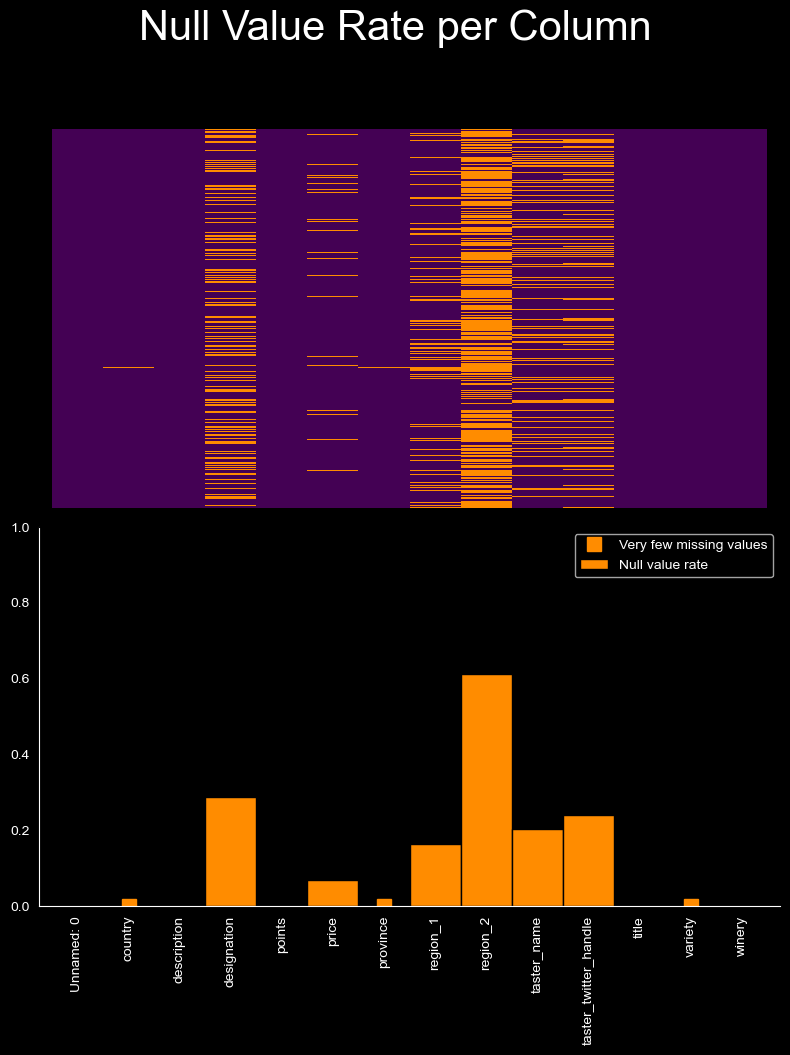

In [9]:
def nullscan(df_check, save=False):
    '''
    df: a dataframe on which we want to perofrm the nullscan
    save: determines, whether you want to save the .png of the plot or not
    
    plots the rate of null values per column in a dataframe using 
    a seaborn heatmap and a barplot.
    '''
    # a df with the same size of the original dataframe, containing True in cells containing NUll values.
    # and False in all the other cells.
    df_nulls = df_check.isna()
    
     # a series containing the sum of all values within a column having the column names as indices.
    # True is interpreted as 1 and False is interpreted as 0 
    nulls_per_col = df_nulls.sum(axis=0)
    
    # the rate makes it way more interpretable:
    nulls_per_col /= len(df_check.index)
    
    with plt.style.context('dark_background'):
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 10))
        vir = matplotlib.cm.get_cmap('viridis')
        colormap = matplotlib.colors.ListedColormap([vir(0), 'darkorange'])
        sns.heatmap(df_check.isnull(), cmap=colormap, cbar=False, yticklabels=False, ax=ax1)
    
        nulls_per_col.plot(kind='bar', color='darkorange', x=nulls_per_col.values, 
                           y=nulls_per_col.index, ax=ax2, width=1, linewidth=1, 
                           edgecolor='black', align='edge', label='Null value rate')
        
        ax2.set_ylim((0,1))
        # centered labels
        labels=df_check.columns
        ticks = np.arange(0.5, len(labels))
        ax2.xaxis.set(ticks=ticks, ticklabels=labels)
    
        # hide spines:
        # NOTE: I could have used ax2.set_frameon(False), 
        # but I wanted the bottom and the left spine to stay white.
        ax2.spines['top'].set_color('black')
        ax2.spines['right'].set_color('black')
        
        
        
        # workaround to visualize very small amounts of null values per col
        na_ticks = ticks[(nulls_per_col > 0) & (nulls_per_col < 0.05)]
        if (len(na_ticks) > 0):
            ax2.plot(na_ticks, [0,]*len(na_ticks), 's', c='darkorange', markersize=10, 
                     label='Very few missing values')
    
        fig.suptitle('Null Value Rate per Column', fontsize=30, y=1.05)
        ax2.legend()
        fig.tight_layout() 
        if(save):
            plt.savefig('nullscan.png')
        plt.show()
nullscan(df)

### Break down the code above

We created a function called nullscan that performs a null value analysis on the df and generates visualizations to display the rate of null values per column:

def nullscan(df_check, save=False):  It takes two parameters, df_check, which represents the DataFrame to be analyzed, and save, a boolean flag indicating whether to save the generated plot as a PNG file.


df_nulls = df_check.isna() : The resulting DataFrame has the same shape as df_check, with True values where the original DataFrame had null values, and False values elsewhere.


nulls_per_col = df_nulls.sum(axis=0) : calculate the sum of True values in each column. The result is a Series called nulls_per_col, where the column names are the indices and the values represent the count of null values in each column.

nulls_per_col /= len(df_check.index) :  This line divides each value in the nulls_per_col Series by the total number of rows in the original DataFrame (len(df_check.index)).

This block of code sets up the figure and the first subplot (ax1) for the heatmap visualization. It uses the dark_background style for the plot. A colormap called viridis is created using matplotlib.cm.get_cmap, and then a custom colormap called colormap is defined using ListedColormap with the viridis and 'darkorange' colors.


The sns.heatmap() function is used to create the heatmap plot. It takes df_check.isnull() as the data, applies the custom colormap, colormap, hides the colorbar (cbar=False), hides the y-axis tick labels (yticklabels=False), and assigns ax1 as the axis for the plot.

In this line, a bar plot is created using nulls_per_col.plot(). The kind parameter is set to 'bar', the color is set to 'darkorange', x is assigned to nulls_per_col.values, and y is assigned to nulls_per_col.index. The plot is assigned to the second subplot (ax2).


Other formatting parameters include width=1 (bar width), linewidth=1 (border width of the bars), edgecolor='black' (color of the bar borders), align='edge' (alignment of bars on the x-axis), and label='Null value rate' (label for the legend).

ax2.set_ylim((0, 1)) : This line sets the y-axis limits of the second subplot (ax2) to range from 0 to 1. This ensures that the vertical bars representing null value rates are scaled appropriately.

Here, the x-axis labels are set to the column names of the original DataFrame (df_check.columns). The x-axis ticks are generated using np.arange() with a start of 0.5 and an end of the number of labels. The xaxis.set() function sets the ticks and tick labels for the x-axis of ax2.

These lines change the color of the top and right spines (borders) of ax2 to black. This is done to hide the spines and only show the bottom and left spines.

This block of code identifies the x-axis tick positions (na_ticks) where the null value rate is greater than 0 and less than 0.05. If there are any such ticks, a scatter plot is created using ax2.plot(). The s parameter specifies the marker shape as square, the color is set to 'darkorange', markersize is set to 10, and a label 'Very few missing values' is assigned to the legend.

The remaining lines set the title of the entire figure (fig.suptitle()), add a legend to ax2 (ax2.legend()), and adjust the spacing of the subplots (fig.tight_layout()).

If the save parameter is True, the figure is saved as a PNG file named 'nullscan.png' using plt.savefig().

Finally, plt.show() is called to display the generated plot on the screen.

To use this function, you would need to pass a DataFrame (df) as an argument when calling the nullscan() function, like nullscan(df).

# <span style="background-color: yellow">2. HANDLE Missing Values:</span>

#### There are some standard ways of handling these Null Values:

- Drop rows containing a specified amount of Null Values. Use this method only, if the number of missing values within the respective row is very high.
- Drop columns containing a specified amount of Null Values if the column isn't too relevant and the number of missing values is very high.
- Replace missing values with the column average. The most common value of a categorical feature and the median or the mean of a numerical feature can be interpreted as the average of the respective column.
- Replace the missing value with a predicted value. Therefore, one could use any Machine Learning Algorithm.
- Replace the missing values with zeros or 'Unknown' and treat it just like any other value if possible

Note: Replacing missing values is often called imputation. If you impute many missing values in one column, it might improve the performance of your model if you create a binary flag column containing ones in all rows where you imputed a missing value

### Drop Rows

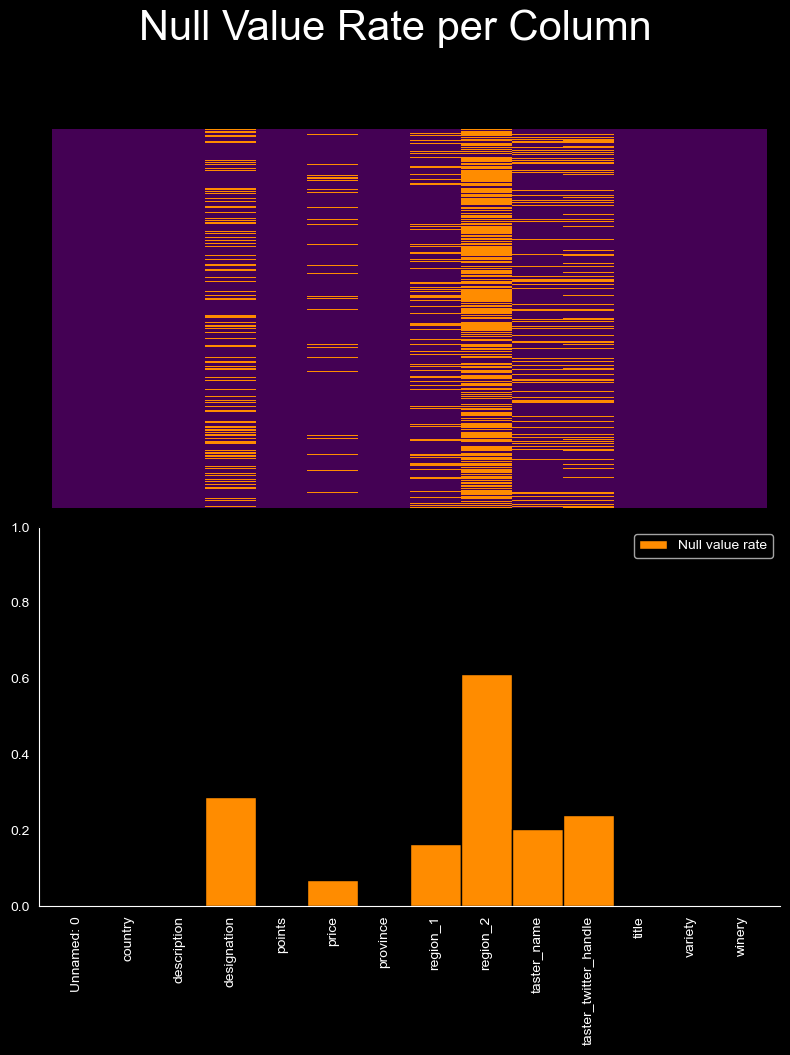

In [10]:
# drop all rows with Null values in 'country', 'province' OR 'variety':
df = df.dropna(subset=['country', 'province', 'variety'])

# one could even drop all rows containing 'too many' Null values:
# nrows_before = len(df.index)
# na_allowed = int(len(df.columns)/3)
# thresh = int(len(df.columns)) - na_allowed
# df = df.dropna(axis=0, thresh=thresh)
# nrows_afterwards = len(df.index)
nullscan(df, save=True)

### Drop Rows

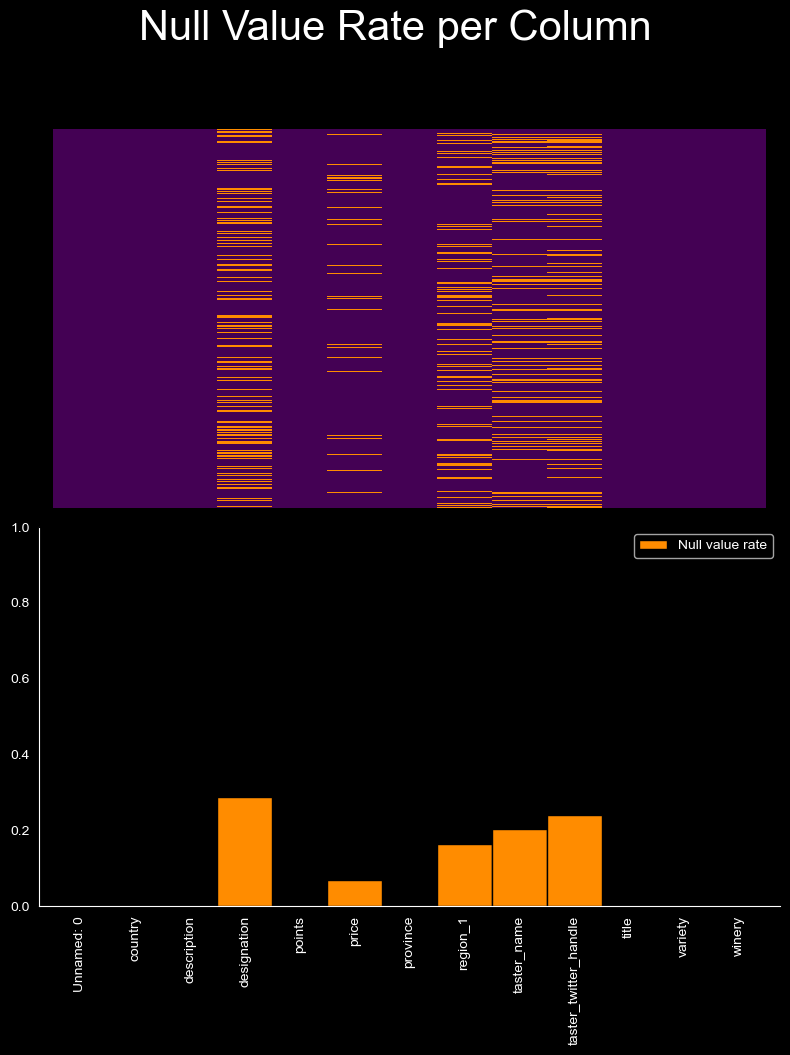

In [11]:
df = df.drop('region_2', axis=1)

nullscan(df)

### Replace Null values with 'Unknown' or 0


The column 'designation' has the second biggest amount of Missing Values. Let's take a look at the column.

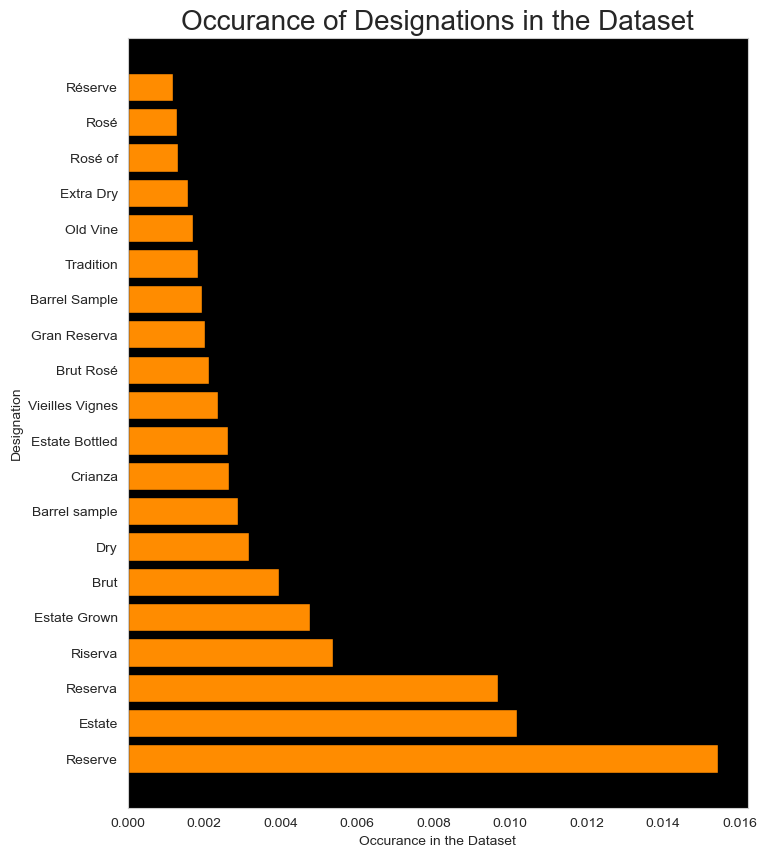

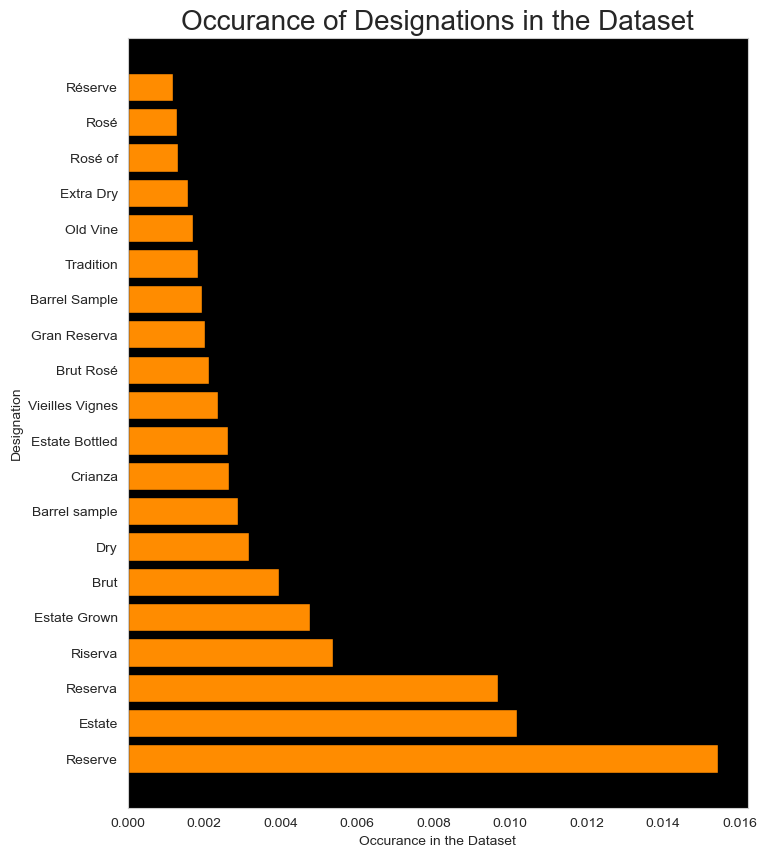

In [15]:
designation = df['designation'].value_counts().head(20) / len(df.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10), sharey=True)
ax.barh(y=designation.index, width=designation.values, color='darkorange', edgecolor='black')
ax.set_title('Occurance of Designations in the Dataset', fontsize=20)
ax.set_xlabel('Occurance in the Dataset')
ax.set_ylabel('Designation')
ax.set_facecolor('black')
plt.show()

Some values appear pretty often and it might be interesting to reveal any relationships between this feature and the other features. We shouldn't drop the column but replace the missing values with anything suitable. Unfortunately, the most common designation 'Reserve' is merely occurring in slightly more than 1% of the rows. Hence, we shouldn't replace the missing values with this most common value of the column.


Alternatively, I suggest replacing missing values with 'Unknown' and treat it like any other value. The same method can be applied to the column 'region_1'.

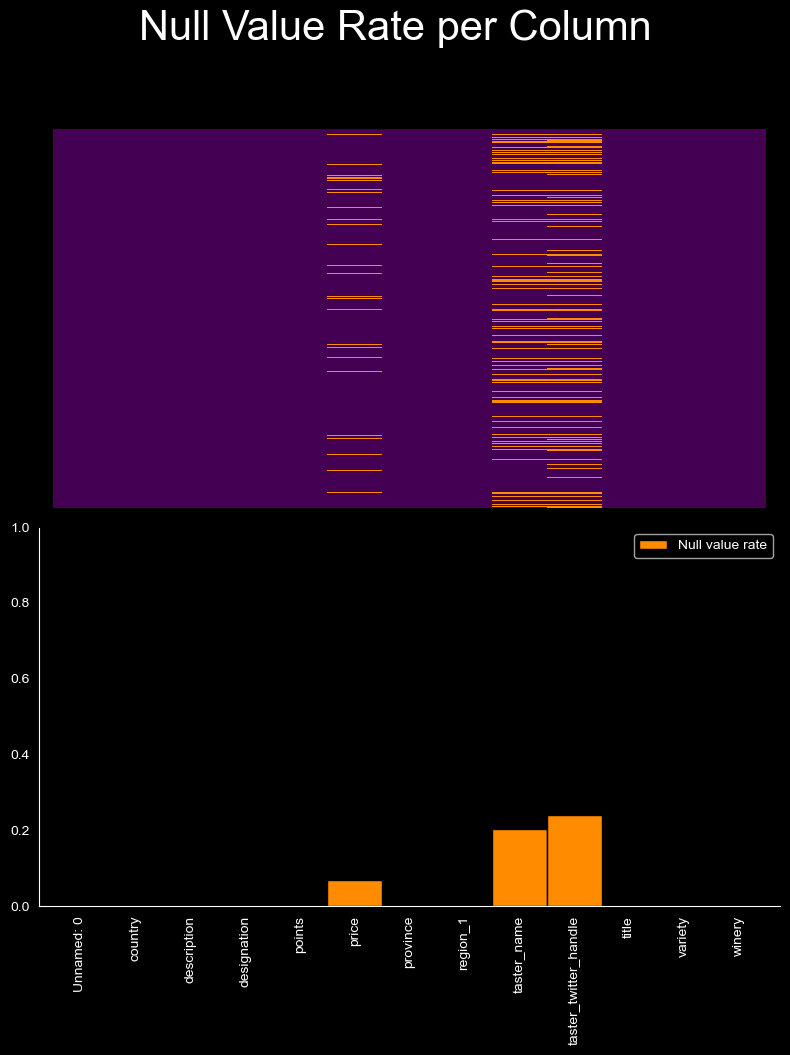

In [16]:
df[['designation', 'region_1']] = df[['designation', 'region_1']].fillna('Unknown')
nullscan(df)

To handle 'taster_name' and 'taster_twitter_handle', we have to get some insights into the relationship of the two variables.

We know that both represent a reviewer and it might happen, that some reviewers are solely known by their name, and that some others are solely known by their Twitter handle. If so, we would have to find a way to merge these two columns into one column containing an identifier for the taster. To that end, we would prioritize the 'taster_name' to distinguish between the tasters from each other and fill the missing values in that column with the Twitter handle in the respective rows. Furthermore, it might happen that a single Twitter handle is used to review wines by multiple people or a single taster can have multiple Twitter handles.

Let's see how often a taster name is given but a Twitter handle isn't:

In [17]:
only_name = df.loc[df['taster_twitter_handle'].isnull() & df['taster_name'].notna(), 
                   ['taster_name', 'taster_twitter_handle']]
num_only_name = len(only_name.index)

only_twitter = df.loc[df['taster_name'].isnull() & df['taster_twitter_handle'].notna(), 
                      ['taster_name', 'taster_twitter_handle']]
num_only_twitter = len(only_twitter.index)

print(f'rows containing a name but no twitter handle: {num_only_name}'
      + f'\nrows containing a twitter handle but no taster name: {num_only_twitter}')

rows containing a name but no twitter handle: 4969
rows containing a twitter handle but no taster name: 0


Since tasters might review wines using multiple Twitter handles, and review differently using differing Twitter handles (e.g. if they delete their Twitter account and start reviewing wine on Twitter using a new account), we should scan if there are any tasters using multiple Twitter handles.

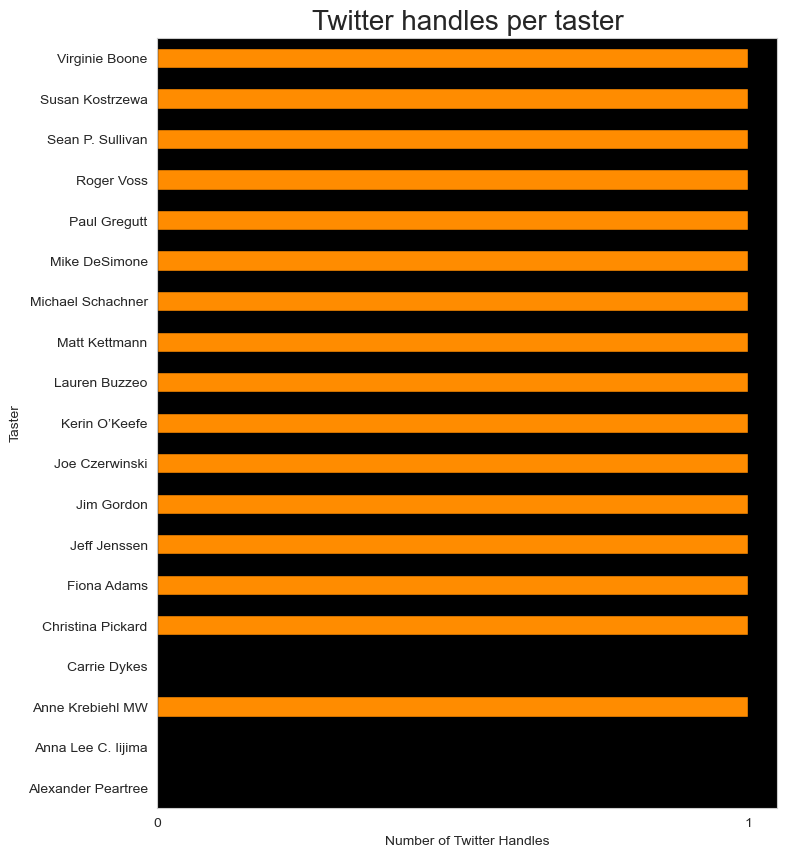

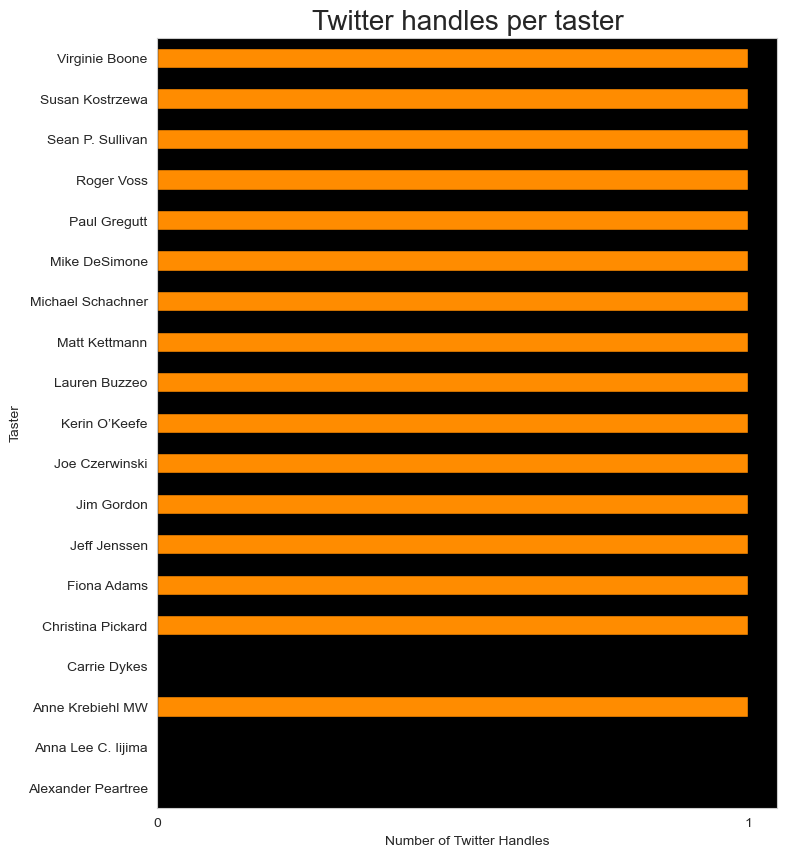

In [19]:
twitter_per_name = df.groupby('taster_name')['taster_twitter_handle'].nunique()
labels = twitter_per_name.index


fig, ax = plt.subplots(figsize=(8,10))
twitter_per_name.plot(kind='barh', ax=ax, color='darkorange', edgecolor='black')
ax.set_xticks([0,1])
ax.set_xlabel('Number of Twitter Handles')
ax.set_ylabel('Taster')
ax.set_title('Twitter handles per taster', fontsize=20)
ax.set_facecolor('black')
plt.show()

As shown above, each taster uses either one Twitter Handle or no Twitter handle at all. Thus, we can simply drop the column 'taster_twitter_handle'. It doesn't provide any further information for our models. Moreover, we can replace the missing values in 'taster_name' with Unknown.

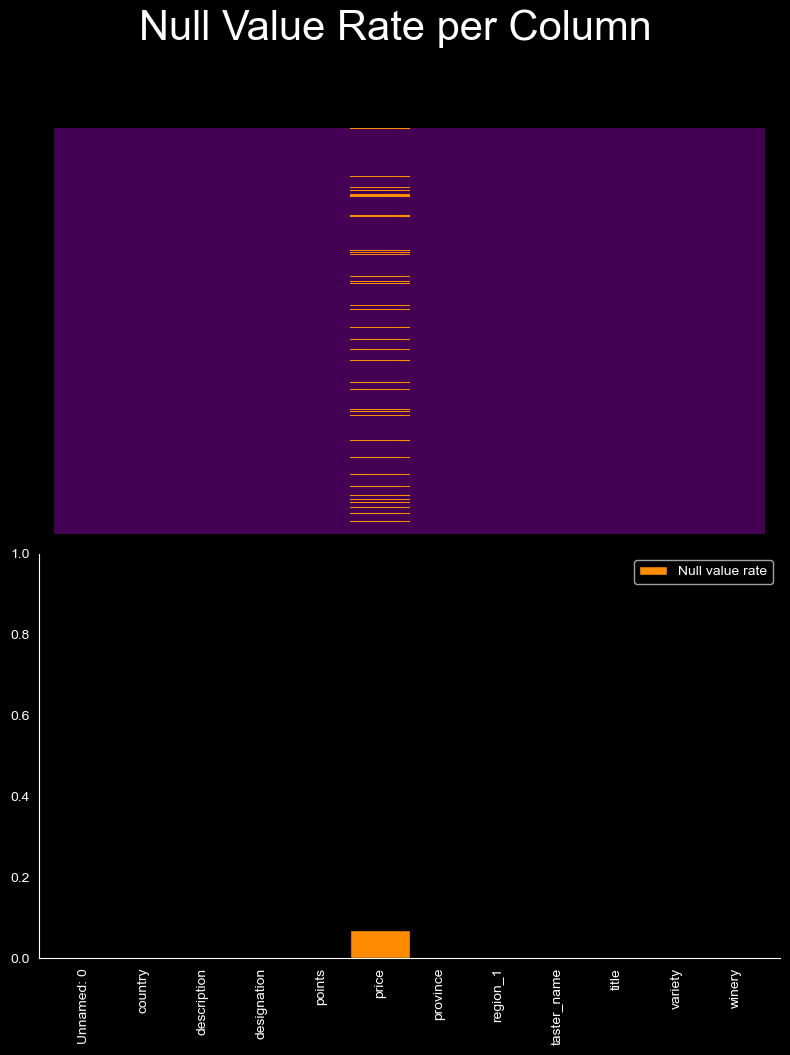

In [20]:
df = df.drop('taster_twitter_handle', axis=1)
df['taster_name'] = df['taster_name'].fillna('Unknown')
nullscan(df)